Housing Price Prediction Model By Armi

In [23]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [33]:
#Load the dataset
df = pd.read_csv('Housing.csv')
df.isnull().sum()
#df.dropna(inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Exploratory Data Analysis

<Axes: xlabel='area', ylabel='price'>

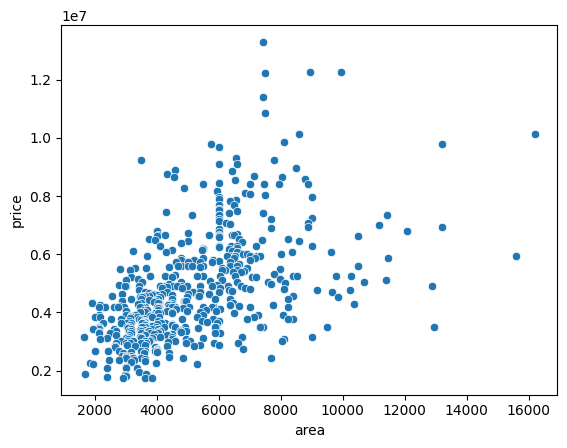

In [25]:
#EDA
import seaborn as sns

sns.scatterplot(x='area', y='price', data=df)

<Axes: >

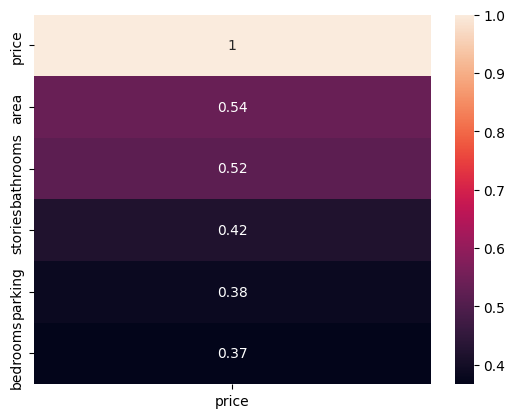

In [31]:
corr = df.corr(numeric_only= True)
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True)


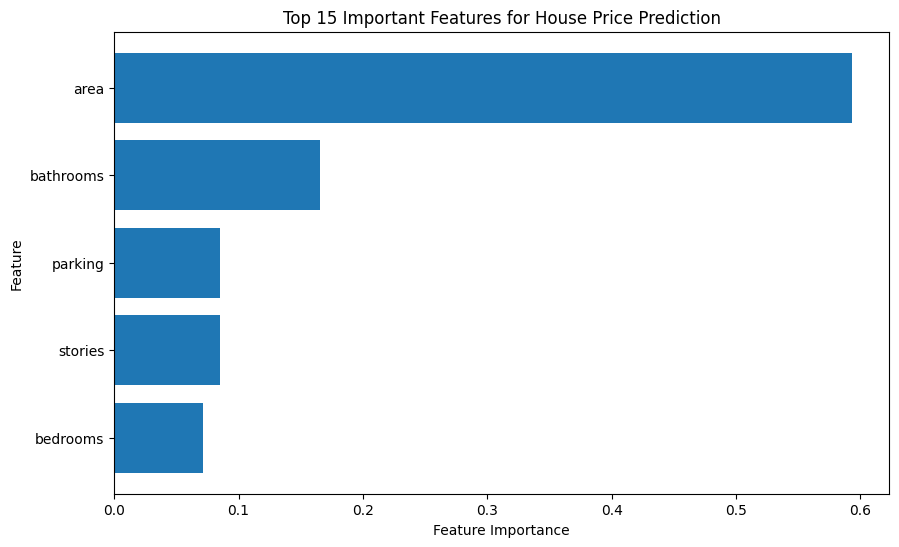

In [42]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# -------------------
# 5. Plot top features
# -------------------
plt.figure(figsize=(10,6))
plt.barh(fi_df['Feature'][:15], fi_df['Importance'][:15])
plt.gca().invert_yaxis()  # highest at top
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features for House Price Prediction")
plt.show()

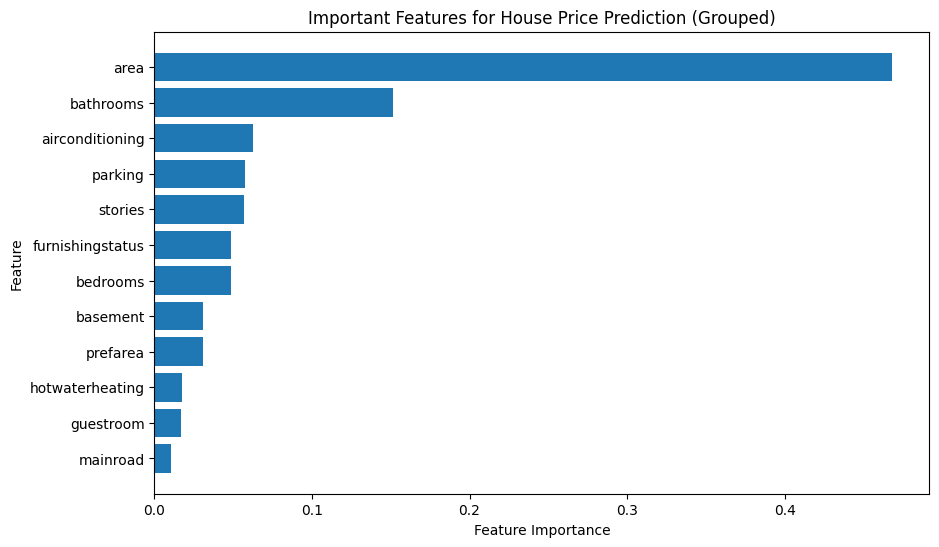

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# -------------------
# 1. Prepare features
# -------------------
#X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus', 'prefarea', 'airconditioning',]]  # added categorical
X = df[df.columns.drop(['price'])]
y = df['price']

# One-hot encode categorical vars
X = pd.get_dummies(X, drop_first=True)

# -------------------
# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# 3. Train model
# -------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -------------------
# 4. Feature importances
# -------------------
importances = model.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Group dummy variables back into parent feature
fi_df['Parent'] = fi_df['Feature'].str.split('_').str[0]
grouped_fi = fi_df.groupby('Parent', as_index=False)['Importance'].sum()
grouped_fi = grouped_fi.sort_values(by='Importance', ascending=False)

# -------------------
# 5. Plot top features
# -------------------
plt.figure(figsize=(10,6))
plt.barh(grouped_fi['Parent'][:15], grouped_fi['Importance'][:15])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Important Features for House Price Prediction (Grouped)")
plt.show()


Build the Model

In [54]:
X = df[['area', 'bathrooms', 'airconditioning', 'parking', 'stories', 'furnishingstatus', 'bedrooms']]
y = df['price']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

ValueError: could not convert string to float: 'yes'